In [1]:
import pandas as pd
import json
import gzip

def parse(path):
  with open(path, 'r', encoding='utf-8') as f:
    for line in f:
      yield json.loads(line)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

reviews_df= getDF('/kaggle/input/ir-ass-3/Electronics_5.json/Electronics_5.json')
metadata_df= getDF('/kaggle/input/ir-ass-3/meta_Electronics.json/meta_Electronics.json')

In [2]:
print(reviews_df.shape)
print(metadata_df.shape)

(6739590, 12)
(786445, 19)


In [3]:
print(reviews_df.columns)
print(metadata_df.columns)

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image'],
      dtype='object')
Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')


In [4]:
dropping_list= []
count= 0

product_name= 'television'

for i in metadata_df['title']:
    if product_name not in i.lower():
        dropping_list.append(count)
    count+= 1

print(metadata_df.shape[0]-len(dropping_list))

1815


In [5]:
df_dropped = metadata_df.drop(index=dropping_list)

In [6]:
print(df_dropped.shape)

(1815, 19)


In [7]:
merged_df = pd.merge(reviews_df, df_dropped, on='asin', how='inner')

In [8]:
print(merged_df.shape)

(7576, 30)


In [9]:
print(merged_df.columns)

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image', 'category', 'tech1', 'description', 'fit', 'title', 'also_buy',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'imageURL', 'imageURLHighRes',
       'details'],
      dtype='object')


In [10]:
merged_df.to_csv('output.csv', index=False, escapechar='\t')

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          7576 non-null   float64
 1   vote             1204 non-null   object 
 2   verified         7576 non-null   bool   
 3   reviewTime       7576 non-null   object 
 4   reviewerID       7576 non-null   object 
 5   asin             7576 non-null   object 
 6   style            2515 non-null   object 
 7   reviewerName     7575 non-null   object 
 8   reviewText       7573 non-null   object 
 9   summary          7576 non-null   object 
 10  unixReviewTime   7576 non-null   int64  
 11  image            138 non-null    object 
 12  category         7576 non-null   object 
 13  tech1            7576 non-null   object 
 14  description      7576 non-null   object 
 15  fit              7576 non-null   object 
 16  title            7576 non-null   object 
 17  also_buy      

In [12]:
merged_df.drop(['style', 'image','tech1','tech2','fit','imageURL','imageURLHighRes','also_buy','also_view','similar_item','details','description','rank','feature','price','reviewerName','summary','date','vote'], axis=1, inplace=True)

In [13]:
merged_df.dropna(axis=0)
merged_df['reviewTime'] = pd.to_datetime(merged_df['reviewTime'])
merged_df = merged_df.reset_index(drop=True)

for col in merged_df.columns:
    if merged_df[col].apply(lambda x: isinstance(x, list) or isinstance(x, dict)).any():
        merged_df[col] = merged_df[col].astype(str)

merged_df.drop_duplicates(inplace=True)

In [14]:
merged_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,unixReviewTime,category,title,brand,main_cat
0,5.0,True,2010-03-21,A3QZ7T9N48IAGT,B00006HOH7,Instructions easy to follow. The product is st...,1269129600,"['Electronics', 'Accessories & Supplies', 'Aud...",Peerless PM1327B Tilt Wall Mount for 13 Inch t...,Peerless,Home Audio & Theater
2,5.0,True,2013-12-10,A1Q0RDBY0297X1,B00006HOH7,"Purchased this mount for a 23"" all in one pc. ...",1386633600,"['Electronics', 'Accessories & Supplies', 'Aud...",Peerless PM1327B Tilt Wall Mount for 13 Inch t...,Peerless,Home Audio & Theater
4,5.0,True,2013-12-06,A2OQD81TISZUH0,B00006HOH7,This mount served the purpose for it's intent....,1386288000,"['Electronics', 'Accessories & Supplies', 'Aud...",Peerless PM1327B Tilt Wall Mount for 13 Inch t...,Peerless,Home Audio & Theater
6,5.0,True,2013-09-18,AZ9LGSKUZ1N2D,B00006HOH7,Definitely a lot of value for the dollar. Heav...,1379462400,"['Electronics', 'Accessories & Supplies', 'Aud...",Peerless PM1327B Tilt Wall Mount for 13 Inch t...,Peerless,Home Audio & Theater
8,5.0,True,2013-01-01,A8BW6F16DEZOZ,B00006HOH7,I was unable to find a wall mount to accommoda...,1356998400,"['Electronics', 'Accessories & Supplies', 'Aud...",Peerless PM1327B Tilt Wall Mount for 13 Inch t...,Peerless,Home Audio & Theater


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7373 entries, 0 to 7575
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   overall         7373 non-null   float64       
 1   verified        7373 non-null   bool          
 2   reviewTime      7373 non-null   datetime64[ns]
 3   reviewerID      7373 non-null   object        
 4   asin            7373 non-null   object        
 5   reviewText      7370 non-null   object        
 6   unixReviewTime  7373 non-null   int64         
 7   category        7373 non-null   object        
 8   title           7373 non-null   object        
 9   brand           7373 non-null   object        
 10  main_cat        7373 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 640.8+ KB


In [16]:
merged_df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewText',
       'unixReviewTime', 'category', 'title', 'brand', 'main_cat'],
      dtype='object')

# Descriptive Statistics

In [17]:
print(f"Number of Reviews: {merged_df.shape[0]}")
print(f"Average Rating: {merged_df['overall'].mean()}")
print(f"Number of Unique Products: {merged_df['title'].nunique()}")
print(f"Number of Good Rating: {merged_df[merged_df['overall']>=3]['overall'].count()}")
print(f"Number of Bad Rating: {merged_df[merged_df['overall']<3]['overall'].count()}")
print(f"Number of Reviews corresponding to each Rating: {merged_df['overall'].value_counts().sort_index()}")

Number of Reviews: 7373
Average Rating: 4.153940051539401
Number of Unique Products: 224
Number of Good Rating: 6337
Number of Bad Rating: 1036
Number of Reviews corresponding to each Rating: overall
1.0     651
2.0     385
3.0     646
4.0    1187
5.0    4504
Name: count, dtype: int64


# Preprocess the Text

In [18]:
merged_df['reviewText'].head()

0    Instructions easy to follow. The product is st...
2    Purchased this mount for a 23" all in one pc. ...
4    This mount served the purpose for it's intent....
6    Definitely a lot of value for the dollar. Heav...
8    I was unable to find a wall mount to accommoda...
Name: reviewText, dtype: object

In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [20]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [21]:
!pip install spacy


In [22]:
import pandas as pd
import re
import unicodedata
import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet as wn
# nltk.download('wordnet')
# nltk.download('omw-1.4')
import spacy

nlp = spacy.load('en_core_web_sm')

def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)

def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def expand_acronyms(text):
    acronyms = {'tv': 'television', 'yrs': 'years', 'hrs': 'hours'}
    pattern = re.compile(r'\b(' + '|'.join(acronyms.keys()) + r')\b')
    return pattern.sub(lambda x: acronyms[x.group()], text.lower())

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

def lemmatize_text_spacy(text):
    doc = nlp(text)    
    lemmatized_output = ' '.join([token.lemma_ for token in doc])
    return lemmatized_output

def preprocess_col(text):
    text = text.lower()
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = expand_acronyms(text)
    text = remove_special_characters(text)
#     print("6")
    text = lemmatize_text_spacy(text)
#     print("7")
    return text

In [23]:
for col in merged_df.columns:
    if merged_df[col].dtype=='object':
        print(col)
        merged_df[col]= merged_df[col].astype(str)
        merged_df[col]= merged_df[col].apply(preprocess_col)

reviewerID
asin
reviewText
category
title
brand
main_cat


# EDA

In [24]:
pip install pandas matplotlib wordcloud nltk

Note: you may need to restart the kernel to use updated packages.


In [25]:
most_reviewed_brands = merged_df['title'].value_counts().head(20)
least_reviewed_brands = merged_df['title'].value_counts().tail(20)

most_positively_reviewed = merged_df.groupby('title')['overall'].mean().idxmax()

merged_df['Year'] = merged_df['reviewTime'].dt.year
ratings_over_years = merged_df[merged_df['Year'].between(2011, 2015)].groupby('Year')['overall'].count()

In [26]:
print(f"Top 20 most reviewed brands: {most_reviewed_brands}")
print(f"Top 20 least reviewed brands: {least_reviewed_brands}")

print(f"Most positively reviewed: {most_positively_reviewed}")
print(f"Count of Ratings: {ratings_over_years}")

Top 20 most reviewed brands: title
2019 upgrade hdtv antenna   digital amplify hd television antenna 6080 mile range 4k hd vhf uhf freeview television local channel wdetachable signal amplifier and 165 ft long coax cable               568
mohu television antenna leaf 30 paperthin indoor hdtv antenna for free television mh110502 certify refurbish                                                                                            365
august dta240 high gain digital television aerial   portable indooroutdoor digital antenna for usb television tuner   atsc television   dab radio   with magnetic base                                  314
mohu leaf 30 television antenna indoor 30 mile range original paperthin reversible paintable 4kready hdtv 10 foot detachable cable premium material for performance usa make mh110598                   300
videosecu television wall mount tilt low profile ultra slim television mount bracket for most 26quot 47quot lead lcd plasma television some up to 55q

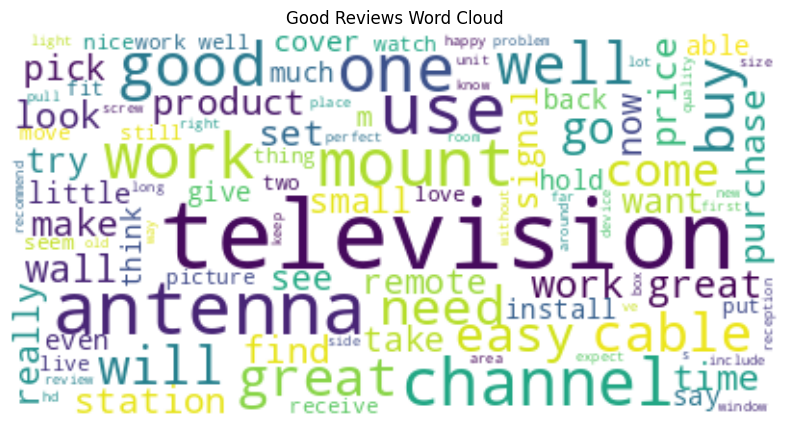

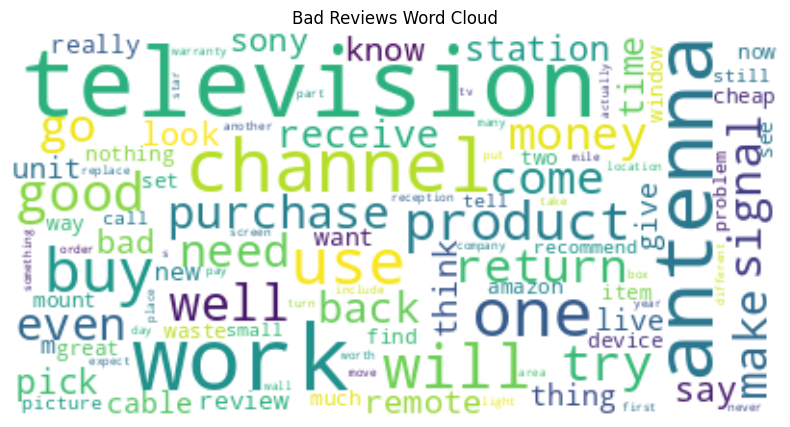

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

good_reviews = merged_df[merged_df['overall'] >= 3]['reviewText']
bad_reviews = merged_df[merged_df['overall'] < 3]['reviewText']

good_reviews = good_reviews.astype(str)
bad_reviews = bad_reviews.astype(str)

good_string = " ".join(review for review in good_reviews)
bad_string = " ".join(review for review in bad_reviews)

wordcloud_good = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(good_string)
wordcloud_bad = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(bad_string)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis("off")
plt.title('Good Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis("off")
plt.title('Bad Reviews Word Cloud')
plt.show()

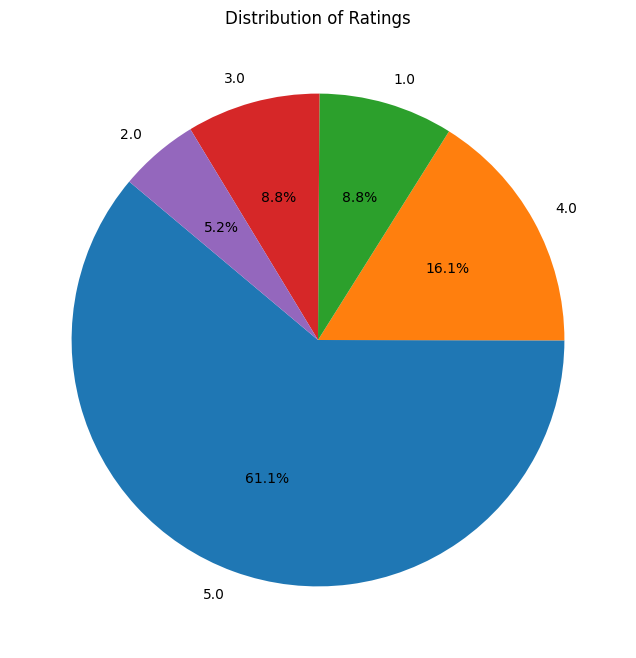

In [28]:
rating_counts = merged_df['overall'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.show()

In [29]:
year_max_reviews = merged_df['Year'].value_counts().idxmax()
year_max_customer = merged_df['Year'].value_counts().idxmax()

In [30]:
print(f"Year with maximum reviews: {year_max_reviews}")
print(f"Year with maximum customers: {year_max_customer}")

Year with maximum reviews: 2016
Year with maximum customers: 2016


# 7

In [31]:
merged_df['reviewText'].head()

0    instruction easy to follow the product be stro...
2    purchase this mount for a 23 all in one pc it ...
4    this mount serve the purpose for its intent \n...
6    definitely a lot of value for the dollar heavy...
8    I be unable to find a wall mount to accommodat...
Name: reviewText, dtype: object

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

merged_df['reviewText'].fillna('', inplace=True)
merged_df['reviewText'] = merged_df['reviewText'].astype(str)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(merged_df['reviewText'])

/tmp/ipykernel_33/2330406741.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['reviewText'].fillna('', inplace=True)


# Machine Learning Models

In [33]:
def categorize_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

In [34]:
merged_df['RatingClass'] = merged_df['overall'].apply(categorize_rating)

In [35]:
y= merged_df['RatingClass']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, digits=3))


Model: Logistic Regression
              precision    recall  f1-score   support

     Average      0.349     0.239     0.284       159
         Bad      0.691     0.613     0.649       266
        Good      0.882     0.932     0.906      1419

    accuracy                          0.826      1844
   macro avg      0.640     0.594     0.613      1844
weighted avg      0.808     0.826     0.815      1844

Model: Multinomial Naive Bayes
              precision    recall  f1-score   support

     Average      0.214     0.019     0.035       159
         Bad      0.684     0.301     0.418       266
        Good      0.810     0.978     0.886      1419

    accuracy                          0.798      1844
   macro avg      0.569     0.433     0.446      1844
weighted avg      0.741     0.798     0.745      1844

Model: SVM
              precision    recall  f1-score   support

     Average      0.000     0.000     0.000       159
         Bad      0.765     0.282     0.412       266
      

# Collaborative Filtering

In [38]:
merged_df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewText',
       'unixReviewTime', 'category', 'title', 'brand', 'main_cat', 'Year',
       'RatingClass'],
      dtype='object')

In [39]:
import numpy as np

user_item_df = pd.DataFrame({
    'reviewerID': merged_df['reviewerID'].unique(),
})

reviewer_count = merged_df['reviewerID'].nunique()

for i in merged_df['title'].unique():
    user_item_df[i] = np.full((reviewer_count), 0)

mino = 0
maxo = 0
    
user_item_df = user_item_df.set_index('reviewerID')

# print(merged_df.iloc[0]['reviewerID'])
for i in range(merged_df.shape[0]):
#     print(i)
    user_item_df.loc[merged_df.iloc[i]['reviewerID']][merged_df.iloc[i]['title']] = merged_df.iloc[i]['overall']
    if merged_df.iloc[i]['overall'] > maxo:
        maxo = merged_df.iloc[i]['overall']


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

user_item_df_normalized = pd.DataFrame(scaler.fit_transform(user_item_df), index=user_item_df.index, columns=user_item_df.columns)

user_item_df_normalized.head()

,peerless pm1327b tilt wall mount for 13 inch to 27 inch crt television discontinue by manufacturer,phillips xl2100 rear projection television replacement lamp rptv for sony,samsung hlp5063w 50inch widescreen hdready dlp television,samsung hlp5085w 50inch widescreen hdready dlp television with pc input,nhj portable television watch wearable 15 lcd television wristwatch,panasonic pt50lc14 50 widescreen hdready television,sony grand wega kdf42we655 42inch lcd projection television with integrate hdtv tuner,sanus vmtvb articulating wall mount for 13 to 27 inch crt television black,sony kdf60xs955 60inch hdready lcd projection television,sony kdfe50a10 50inch lcd rear projection television,...,assurant 4year television protection plan 90099999,assurant 4year television protection plan 1500174999,assurant 5year television protection plan 40044999,assurant 5year television protection plan 2000224999,4 pair kid passive 3d glass genuine edimensional seal reald compatible circular polarize 3d glass for passive 3d television television include 4k from sony panasonic vizio toshiba lg philips and jvc and for use in reald theater,3year dop television plan 250300,neewer 5 piece of 6 x 9ft18 x 28 m photo studio muslin collapsible background backdrop whiteblackbluegreygreen for photographyvideo and television backdrop only,mvpower 10x10 ft 3x3 m photo backdrop background screen cloth nonwoven fabric for studio photography video shooting and television white,2019 new television antennaindoor amplify digital hdtv antenna 120 mile range with 4k 1080p hd vhf uhf freeview television for life local channel broadcast for all type of home smart television black02,five j dsh002j20 g television mount 20quot l
reviewerID,,,,,,,,,,,,,,,,,,,,,
a3qz7t9n48iagt,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a1q0rdby0297x1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a2oqd81tiszuh0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
az9lgskuz1n2d,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a8bw6f16dezoz,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
merged_df.to_csv('output2.csv', index=False, escapechar='\t')

In [42]:
user_item_df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7141 entries, a3qz7t9n48iagt to a29scch1fd2mzl
Columns: 224 entries, peerless pm1327b tilt wall mount for 13 inch to 27 inch crt television discontinue by manufacturer to five j dsh002j20 g television mount 20quot l
dtypes: float64(224)
memory usage: 12.5+ MB


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(user_item_df_normalized)
user_similarities = pd.DataFrame(cosine_sim, index=user_item_df_normalized.index, columns=user_item_df_normalized.index)


In [44]:
merged_df['reviewerID'][0]

'a3qz7t9n48iagt'

In [45]:
# user_item_df_normalized.head()
user_similarities.head()

reviewerID,a3qz7t9n48iagt,a1q0rdby0297x1,a2oqd81tiszuh0,az9lgskuz1n2d,a8bw6f16dezoz,a1edpghc9eybun,a11bsmjgz0u072,al1xv4l25fz2s,a211xx6etnpdw6,a3u0djze5adzxk,...,a1e9icxsmpaqh4,a9efskl75s5q2,a22f9e35mjpogz,a1vsgwjkg0cd04,a323yedkxktc3k,a3he6k7st1pudv,a23a3gwdmlrxzl,a1e9eexcnfwxoi,a37m2nv1uclj92,a29scch1fd2mzl
reviewerID,,,,,,,,,,,,,,,,,,,,,
a3qz7t9n48iagt,1.000000,0.707107,0.707107,0.707107,0.707107,0.707107,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a1q0rdby0297x1,0.707107,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a2oqd81tiszuh0,0.707107,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
az9lgskuz1n2d,0.707107,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a8bw6f16dezoz,0.707107,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
def find_top_n_similar_users(user_id, n=10):
    sim_scores = user_similarities.loc[user_id].sort_values(ascending=False)
    
    sim_scores = sim_scores[sim_scores.index != user_id]
    
    top_n_users = sim_scores.head(n).index
    return top_n_users

list_n = [10, 20, 30, 40, 50]

for i in list_n:
    print(f"Top {i} similar users for reviewer a3qz7t9n48iagt: {find_top_n_similar_users('a3qz7t9n48iagt', i)}")


Top 10 similar users for reviewer a3qz7t9n48iagt: Index(['a2tc5cz2mrttka', 'a38j7htuco3sxc', 'a3inuenvjrk20b', 'a2padxrxk7jrw5',
       'ajgxgxr76j1c9', 'a1n15e2jg1f3lh', 'a58rv7dpufbiu', 'a191h27emuofzm',
       'aojngo68tu873', 'a3pxkriarqihro'],
      dtype='object', name='reviewerID')
Top 20 similar users for reviewer a3qz7t9n48iagt: Index(['a2tc5cz2mrttka', 'a38j7htuco3sxc', 'a3inuenvjrk20b', 'a2padxrxk7jrw5',
       'ajgxgxr76j1c9', 'a1n15e2jg1f3lh', 'a58rv7dpufbiu', 'a191h27emuofzm',
       'aojngo68tu873', 'a3pxkriarqihro', 'a35fr160281nsq', 'a2ea1x2vstts7e',
       'acjw2aiolj28r', 'adluqdxnchsbc', 'a275mst08aeqah', 'a3oztj0ssekqhk',
       'a236904opurj0o', 'aqulk8mm29bw3', 'a3gk3omrxo0d6r', 'a3iauqoy7mfvn4'],
      dtype='object', name='reviewerID')
Top 30 similar users for reviewer a3qz7t9n48iagt: Index(['a2tc5cz2mrttka', 'a38j7htuco3sxc', 'a3inuenvjrk20b', 'a2padxrxk7jrw5',
       'ajgxgxr76j1c9', 'a1n15e2jg1f3lh', 'a58rv7dpufbiu', 'a191h27emuofzm',
       'aojngo68tu873',

In [49]:
from sklearn.model_selection import KFold
import numpy as np

ratings_mat = user_similarities.to_numpy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 0
for train_indices, test_indices in kf.split(ratings_mat):
    fold += 1
    print(f"Fold {fold}")
    
    X_train, X_val = ratings_mat[train_indices], ratings_mat[test_indices]
    
    print(f"Training data set size: {X_train.shape}, Validation data set size: {X_val.shape}")

Fold 1
Training data set size: (5712, 7141), Validation data set size: (1429, 7141)
Fold 2
Training data set size: (5713, 7141), Validation data set size: (1428, 7141)
Fold 3
Training data set size: (5713, 7141), Validation data set size: (1428, 7141)
Fold 4
Training data set size: (5713, 7141), Validation data set size: (1428, 7141)
Fold 5
Training data set size: (5713, 7141), Validation data set size: (1428, 7141)


In [73]:
user_item_ratings = user_item_df_normalized.fillna(0)

user_similarity_matrix = user_similarities.to_numpy()

from sklearn.metrics import mean_absolute_error

def predict_ratings_for_user(user_index, train_indices, top_n, user_similarity_matrix, user_item_ratings):
    similarities = user_similarity_matrix[user_index, train_indices]
    top_n_indices = np.argsort(similarities)[-top_n:]
    
    predicted_ratings = np.mean(user_item_ratings.iloc[train_indices[top_n_indices]], axis=0)
    return predicted_ratings

mae_scores = {k: [] for k in [10, 20, 30, 40, 50]}

for train_indices, test_indices in kf.split(user_similarity_matrix):
    for k in [10, 20, 30, 40, 50]:
        individual_maes = []
        for user_index in test_indices:
            actual_ratings = user_item_ratings.iloc[user_index]
            predicted_ratings = predict_ratings_for_user(user_index, train_indices, k, user_similarity_matrix, user_item_ratings)
            mae = mean_absolute_error(actual_ratings, predicted_ratings)
            individual_maes.append(mae)
        mae_scores[k].append(np.mean(individual_maes))

avg_mae_score_user = []
for k, scores in mae_scores.items():
    print(f"Average MAE for K={k}: {np.mean(scores)}")
    avg_mae_score_user.append(np.mean(scores))

Average MAE for K=10: 0.0013078857548967802
Average MAE for K=20: 0.0017213903077851155
Average MAE for K=30: 0.002072926012602382
Average MAE for K=40: 0.0023713293432750986
Average MAE for K=50: 0.0026088991317310692


In [61]:
item_user_ratings = user_item_ratings.T 

from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

item_similarity_matrix = cosine_similarity(item_user_ratings.fillna(0))
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=item_user_ratings.index, columns=item_user_ratings.index)


In [62]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_item = {k: [] for k in [10, 20, 30, 40, 50]}

In [63]:
def predict_ratings_for_item(item_index, train_indices, top_n, item_similarity_matrix, item_user_ratings):
    similarities = item_similarity_matrix[item_index, train_indices]
    top_n_indices = np.argsort(similarities)[-top_n:]
    
    predicted_ratings = np.mean(item_user_ratings.iloc[train_indices[top_n_indices]], axis=0)
    return predicted_ratings


In [64]:
for train_indices, test_indices in kf.split(item_similarity_matrix):
    for k in [10, 20, 30, 40, 50]:
        individual_maes = []
        for item_index in test_indices:
            actual_ratings = item_user_ratings.iloc[item_index]
            predicted_ratings = predict_ratings_for_item(item_index, train_indices, k, item_similarity_matrix, item_user_ratings)
            mae = mean_absolute_error(actual_ratings, predicted_ratings)
            individual_maes.append(mae)
        mae_scores_item[k].append(np.mean(individual_maes))


In [74]:
avg_mae_score_item = []
for k, scores in mae_scores_item.items():
    print(f"Average MAE for K={k}: {np.mean(scores)}")
    avg_mae_score_item.append(np.mean(scores))


Average MAE for K=10: 0.009766461633560078
Average MAE for K=20: 0.009075420745757533
Average MAE for K=30: 0.009356002894085797
Average MAE for K=40: 0.008594982010979422
Average MAE for K=50: 0.008715155178730309


AttributeError: 'dict' object has no attribute 'shape'

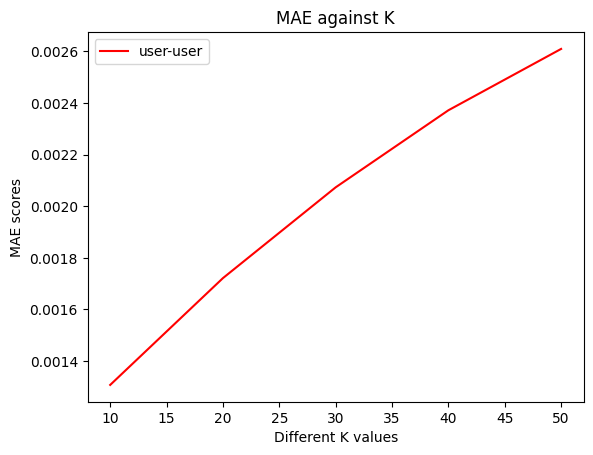

In [75]:
x_axis = [10, 20, 30, 40, 50]

plt.plot(x_axis, avg_mae_score_user, label='user-user', color='red', linestyle='-')

plt.xlabel('Different K values')
plt.ylabel('MAE scores')
plt.title('MAE against K')
plt.legend()

plt.show()

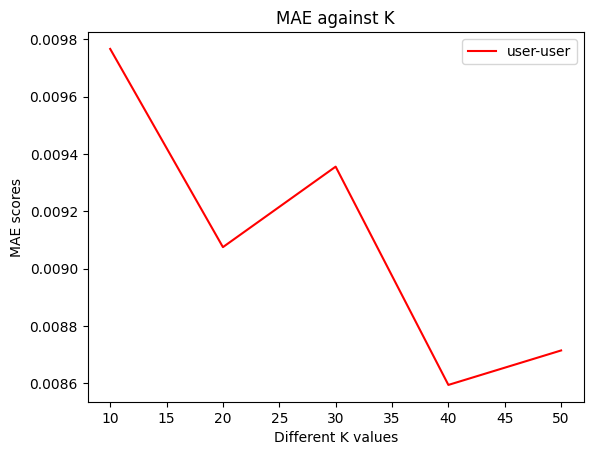

In [76]:
x_axis = [10, 20, 30, 40, 50]

plt.plot(x_axis, avg_mae_score_item, label='user-user', color='red', linestyle='-')

plt.xlabel('Different K values')
plt.ylabel('MAE scores')
plt.title('MAE against K')
plt.legend()

plt.show()

In [77]:
sum_ratings = merged_df.groupby('title')['overall'].sum()

top_10_products = sum_ratings.sort_values(ascending=False).head(10)

print(top_10_products)

title
2019 upgrade hdtv antenna   digital amplify hd television antenna 6080 mile range 4k hd vhf uhf freeview television local channel wdetachable signal amplifier and 165 ft long coax cable               2253.0
mohu television antenna leaf 30 paperthin indoor hdtv antenna for free television mh110502 certify refurbish                                                                                            1522.0
august dta240 high gain digital television aerial   portable indooroutdoor digital antenna for usb television tuner   atsc television   dab radio   with magnetic base                                  1245.0
mohu leaf 30 television antenna indoor 30 mile range original paperthin reversible paintable 4kready hdtv 10 foot detachable cable premium material for performance usa make mh110598                   1194.0
videosecu television wall mount tilt low profile ultra slim television mount bracket for most 26quot 47quot lead lcd plasma television some up to 55quot television wi